                    The Sparks Foundation - Data Science & Business Analytics Internship

    Task 8 - Timeline Analysis Covid-19

    Objective :
        ● Create a storyboard showing spread of Covid-19 cases in your country or
        any region (Asia, Europe, BRICS etc) using Tableau, Power BI or SAP.
        ● Use animation, timeline and annotations to create attractive and interactive
        dashboards and story.
        ● Identify interesting patterns and possible reasons helping Covid-19 spread
        with basic as well as advanced charts.
        ● Screen-record the completed storyboard along with your audio explaining the
        charts and giving recommendations.

    Author - Harshvardhan Thakur
    1. Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as clr
import seaborn as sns
import random

In [6]:
data= pd.read_csv("covid.csv")
data.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
5,AFG,Asia,Afghanistan,2020-02-29,1.0,0.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
6,AFG,Asia,Afghanistan,2020-03-01,1.0,0.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
7,AFG,Asia,Afghanistan,2020-03-02,1.0,0.0,0.000,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
8,AFG,Asia,Afghanistan,2020-03-03,2.0,1.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
9,AFG,Asia,Afghanistan,2020-03-04,4.0,2.0,0.429,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [7]:
data.shape

(85580, 59)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85580 entries, 0 to 85579
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               85580 non-null  object 
 1   continent                              81451 non-null  object 
 2   location                               85580 non-null  object 
 3   date                                   85580 non-null  object 
 4   total_cases                            83470 non-null  float64
 5   new_cases                              83468 non-null  float64
 6   new_cases_smoothed                     82467 non-null  float64
 7   total_deaths                           73790 non-null  float64
 8   new_deaths                             73948 non-null  float64
 9   new_deaths_smoothed                    82467 non-null  float64
 10  total_cases_per_million                83019 non-null  float64
 11  ne

In [9]:
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [10]:
data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,8.347000e+04,83468.000000,82467.000000,7.379000e+04,73948.000000,82467.000000,83019.000000,83017.000000,82021.000000,73352.000000,...,77418.000000,52700.000000,78005.000000,79158.000000,61115.000000,60214.000000,39197.000000,71182.000000,81224.000000,77890.000000
mean,8.327790e+05,5835.210092,5814.830039,2.316389e+04,139.272232,123.418112,10162.936744,74.399976,74.501633,226.738125,...,19139.031322,13.351256,257.808803,7.821495,10.519807,32.657162,50.913092,3.029442,73.165022,0.727104
std,5.757477e+06,36508.865337,35814.991549,1.370246e+05,760.131276,695.985835,19463.958180,175.604794,149.096175,397.805308,...,19826.544024,19.943900,118.777512,3.978057,10.402752,13.475414,31.763062,2.463426,7.549746,0.150059
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000
25%,9.410000e+02,2.000000,7.000000,4.500000e+01,0.000000,0.000000,204.323500,0.187000,1.160000,6.857000,...,4466.507000,0.500000,167.295000,5.290000,1.900000,21.600000,20.859000,1.300000,67.920000,0.602000
50%,1.052600e+04,70.000000,86.000000,3.160000e+02,2.000000,1.286000,1395.313000,7.655000,10.094000,39.747500,...,12951.839000,2.200000,242.648000,7.110000,6.300000,31.400000,49.839000,2.400000,74.530000,0.748000
75%,1.118042e+05,768.000000,798.000000,3.070000e+03,18.000000,13.714000,9981.204500,68.031000,75.768000,242.682000,...,27216.445000,21.200000,329.635000,10.080000,19.300000,41.100000,83.241000,3.861000,78.730000,0.848000
max,1.528705e+08,905992.000000,826374.286000,3.202523e+06,17906.000000,14435.143000,171901.896000,8652.658000,2648.773000,2877.950000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,98.999000,13.800000,86.750000,0.957000


In [11]:
data.nunique()

iso_code                                   219
continent                                    6
location                                   219
date                                       489
total_cases                              45242
new_cases                                11660
new_cases_smoothed                       22265
total_deaths                             17241
new_deaths                                2751
new_deaths_smoothed                       6194
total_cases_per_million                  64560
new_cases_per_million                    36941
new_cases_smoothed_per_million           41646
total_deaths_per_million                 40023
new_deaths_per_million                    7127
new_deaths_smoothed_per_million           8465
reproduction_rate                          367
icu_patients                              2369
icu_patients_per_million                  4962
hosp_patients                             4604
hosp_patients_per_million                 8193
weekly_icu_ad

In [12]:
data.isnull()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,True,True,False,False,False,False
1,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,True,True,False,False,False,False
2,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,True,True,False,False,False,False
4,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85575,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
85576,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
85577,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
85578,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
data.sum()

iso_code                                 AFGAFGAFGAFGAFGAFGAFGAFGAFGAFGAFGAFGAFGAFGAFGA...
location                                 AfghanistanAfghanistanAfghanistanAfghanistanAf...
date                                     2020-02-242020-02-252020-02-262020-02-272020-0...
total_cases                                                                    6.95121e+10
new_cases                                                                      4.87053e+08
new_cases_smoothed                                                             4.79532e+08
total_deaths                                                                   1.70926e+09
new_deaths                                                                     1.02989e+07
new_deaths_smoothed                                                            1.01779e+07
total_cases_per_million                                                        8.43717e+08
new_cases_per_million                                                          6.17646e+06

In [14]:
data.continent.value_counts()[0:10]

Africa           22363
Europe           20524
Asia             20332
North America    10359
South America     5259
Oceania           2614
Name: continent, dtype: int64

In [15]:
dataset = data[data['date']=='2020-11-15']
dataset = dataset[~dataset['location'].isin(['World', 'International'])]
dataset.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
265,AFG,Asia,Afghanistan,2020-11-15,43240.0,205.0,154.429,1620.0,12.0,7.857,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.511
710,OWID_AFR,NaN,Africa,2020-11-15,1976022.0,12570.0,13308.857,47362.0,296.0,286.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1143,ALB,Europe,Albania,2020-11-15,27830.0,597.0,517.714,623.0,11.0,9.143,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795
1576,DZA,Africa,Algeria,2020-11-15,67679.0,860.0,804.000,2154.0,15.0,15.143,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.748
2003,AND,Europe,Andorra,2020-11-15,5872.0,147.0,69.857,76.0,1.0,0.143,...,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868
2412,AGO,Africa,Angola,2020-11-15,13451.0,77.0,145.429,322.0,0.0,2.143,...,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581
2906,ATG,North America,Antigua and Barbuda,2020-11-15,134.0,0.0,0.429,4.0,0.0,0.143,...,21490.943,NaN,191.511,13.17,NaN,NaN,NaN,3.80,77.02,0.778
3394,ARG,South America,Argentina,2020-11-15,1310491.0,5645.0,9758.429,35436.0,129.0,268.000,...,18933.907,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.845
3822,ARM,Asia,Armenia,2020-11-15,117337.0,1482.0,1559.000,1763.0,25.0,29.143,...,8787.580,1.8,341.010,7.11,1.5,52.1,94.043,4.20,75.09,0.776
4322,OWID_ASI,NaN,Asia,2020-11-15,15118723.0,81910.0,93796.714,266621.0,1463.0,1556.571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
data['location'].value_counts()

Mexico          488
Argentina       488
Thailand        485
Peru            483
Taiwan          473
               ... 
Saint Helena     66
Curacao          35
Aruba            33
Tonga            13
Nauru             8
Name: location, Length: 219, dtype: int64

In [17]:
India = dataset= data[data['location']=='India']
India.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
35186,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
35187,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
35188,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
35189,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
35190,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645


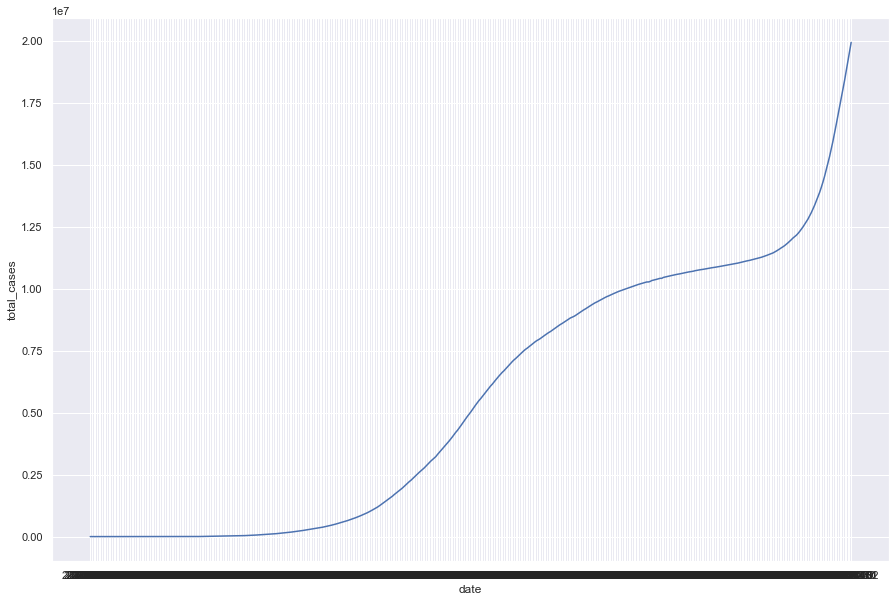

In [19]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x='date', y='total_cases', data=India)
plt.show()

In [22]:
last_five_days = India.tail()

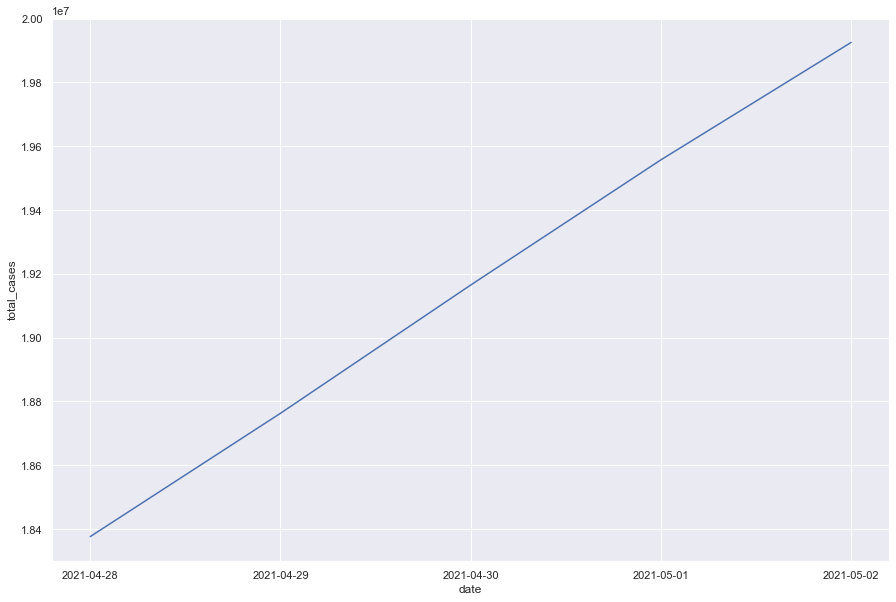

In [24]:
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date", y="total_cases",data=last_five_days)
plt.show()

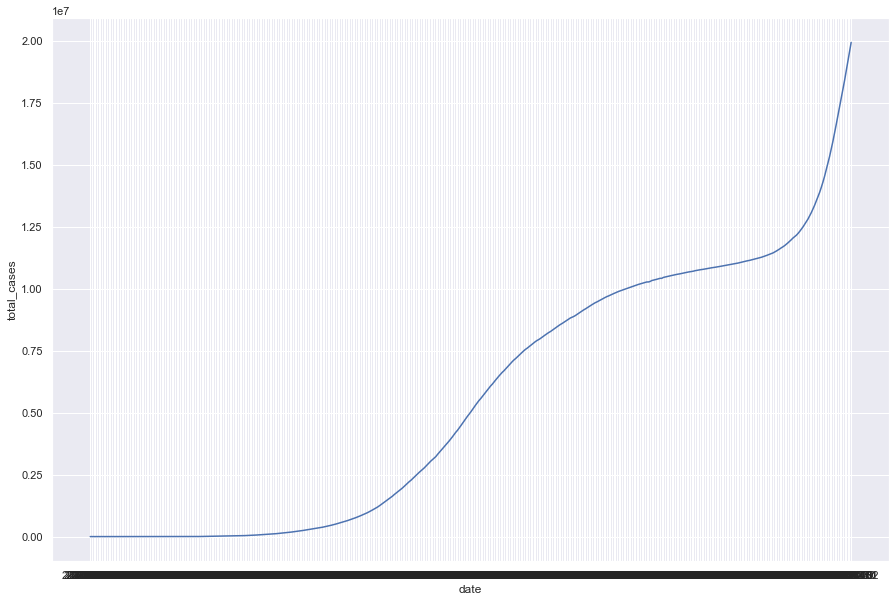

In [26]:
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date", y="total_cases",data=India)
plt.show()

In [29]:
Brazil=data[data["location"]=="Brazil"]

In [30]:
Brazil.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
10974,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
10975,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
10976,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
10977,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
10978,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765


In [31]:
Brazil.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
11401,BRA,South America,Brazil,2021-04-28,14521289.0,79726.0,56927.714,398185.0,3163.0,2387.143,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
11402,BRA,South America,Brazil,2021-04-29,14590678.0,69389.0,60386.429,401186.0,3001.0,2526.286,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
11403,BRA,South America,Brazil,2021-04-30,14659011.0,68333.0,60276.143,403781.0,2595.0,2480.714,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
11404,BRA,South America,Brazil,2021-05-01,14725975.0,66964.0,59680.000,406437.0,2656.0,2420.714,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
11405,BRA,South America,Brazil,2021-05-02,14754910.0,28935.0,59160.429,407639.0,1202.0,2406.000,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765


In [32]:
Brazil_last_five_days=Brazil.tail()

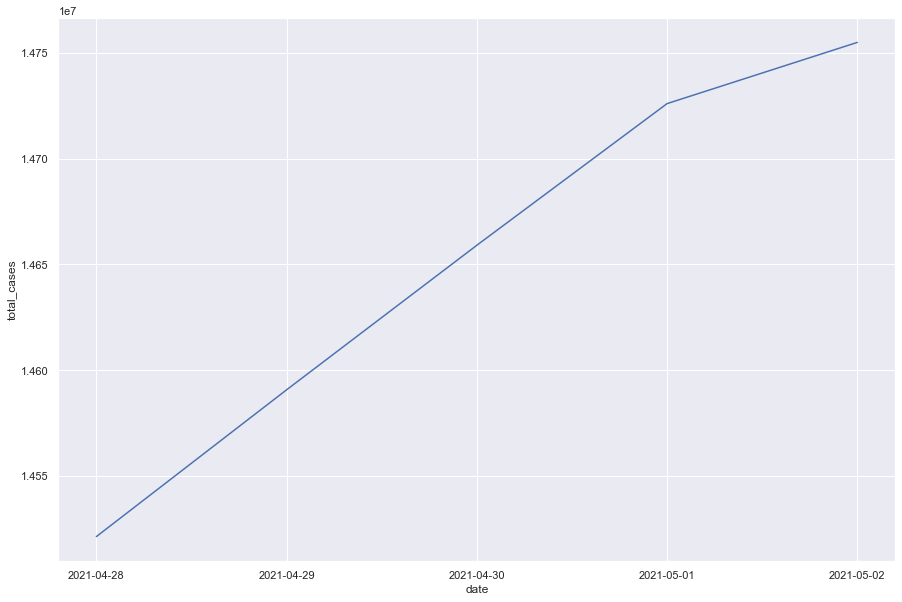

In [33]:
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date", y="total_cases", data=Brazil_last_five_days)
plt.show()

In [34]:
last_day_cases = data[data['date']=='2020-12-18']
last_day_cases.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,1.980000e+02,198.000000,198.00000,1.820000e+02,182.000000,198.000000,197.000000,197.000000,197.000000,181.000000,...,182.000000,124.000000,184.000000,186.000000,143.000000,141.000000,95.000000,167.000000,189.000000,184.000000
mean,1.218884e+06,11713.989899,10461.21503,2.951419e+04,233.263736,193.114768,14617.015858,151.813183,135.833619,289.503812,...,18309.817692,13.916129,262.559821,7.897151,10.403734,32.688191,50.270832,2.999299,72.841481,0.721793
std,6.191326e+06,61400.678809,54707.44724,1.421343e+05,1139.692561,983.457217,17670.301505,236.637249,205.735759,358.701630,...,19415.907989,20.311975,120.798382,4.209656,10.407519,13.571221,31.889658,2.445947,7.557389,0.150358
min,1.000000e+00,0.000000,0.00000,1.000000e+00,0.000000,0.000000,3.256000,0.000000,0.000000,0.084000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000
25%,5.275250e+03,9.250000,14.71400,1.185000e+02,0.000000,0.000000,873.429000,2.231000,3.217000,20.289000,...,3924.303000,0.600000,170.976250,5.295000,1.900000,21.600000,20.105000,1.300000,67.270000,0.599250
50%,4.355900e+04,268.500000,249.50000,9.610000e+02,4.000000,2.857000,6616.200000,30.915000,30.008000,95.571000,...,11822.138500,2.350000,244.312500,7.110000,6.200000,31.400000,49.542000,2.397000,74.250000,0.741000
75%,2.018578e+05,1911.500000,1874.03575,5.764500e+03,44.750000,38.214500,25009.132000,231.502000,203.853000,435.214000,...,26069.050500,21.675000,331.931500,10.080000,18.950000,41.100000,81.568500,3.850500,77.970000,0.831250
max,7.578996e+07,720462.000000,645864.42900,1.680133e+06,12787.000000,11573.571000,97314.437000,1192.745000,1027.443000,1620.602000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,98.999000,13.800000,86.750000,0.957000


In [35]:
max_cases_country=last_day_cases.sort_values(by="total_cases",ascending=False)
max_cases_country.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,1.980000e+02,198.000000,198.00000,1.820000e+02,182.000000,198.000000,197.000000,197.000000,197.000000,181.000000,...,182.000000,124.000000,184.000000,186.000000,143.000000,141.000000,95.000000,167.000000,189.000000,184.000000
mean,1.218884e+06,11713.989899,10461.21503,2.951419e+04,233.263736,193.114768,14617.015858,151.813183,135.833619,289.503812,...,18309.817692,13.916129,262.559821,7.897151,10.403734,32.688191,50.270832,2.999299,72.841481,0.721793
std,6.191326e+06,61400.678809,54707.44724,1.421343e+05,1139.692561,983.457217,17670.301505,236.637249,205.735759,358.701630,...,19415.907989,20.311975,120.798382,4.209656,10.407519,13.571221,31.889658,2.445947,7.557389,0.150358
min,1.000000e+00,0.000000,0.00000,1.000000e+00,0.000000,0.000000,3.256000,0.000000,0.000000,0.084000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000
25%,5.275250e+03,9.250000,14.71400,1.185000e+02,0.000000,0.000000,873.429000,2.231000,3.217000,20.289000,...,3924.303000,0.600000,170.976250,5.295000,1.900000,21.600000,20.105000,1.300000,67.270000,0.599250
50%,4.355900e+04,268.500000,249.50000,9.610000e+02,4.000000,2.857000,6616.200000,30.915000,30.008000,95.571000,...,11822.138500,2.350000,244.312500,7.110000,6.200000,31.400000,49.542000,2.397000,74.250000,0.741000
75%,2.018578e+05,1911.500000,1874.03575,5.764500e+03,44.750000,38.214500,25009.132000,231.502000,203.853000,435.214000,...,26069.050500,21.675000,331.931500,10.080000,18.950000,41.100000,81.568500,3.850500,77.970000,0.831250
max,7.578996e+07,720462.000000,645864.42900,1.680133e+06,12787.000000,11573.571000,97314.437000,1192.745000,1027.443000,1620.602000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,98.999000,13.800000,86.750000,0.957000


In [36]:
max_cases_country[1:6]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
26272,OWID_EUR,NaN,Europe,2020-12-18,21074550.0,244541.0,212044.714,486362.0,5713.0,4998.429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56656,OWID_NAM,NaN,North America,2020-12-18,20251704.0,277539.0,243892.857,467994.0,3931.0,3530.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4355,OWID_ASI,NaN,Asia,2020-12-18,19629928.0,100404.0,102874.429,319870.0,1371.0,1446.429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81461,USA,North America,United States,2020-12-18,17574950.0,251969.0,221072.714,318509.0,2965.0,2711.571,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
26738,OWID_EUN,NaN,European Union,2020-12-18,13969915.0,157984.0,133727.286,331199.0,4093.0,3516.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


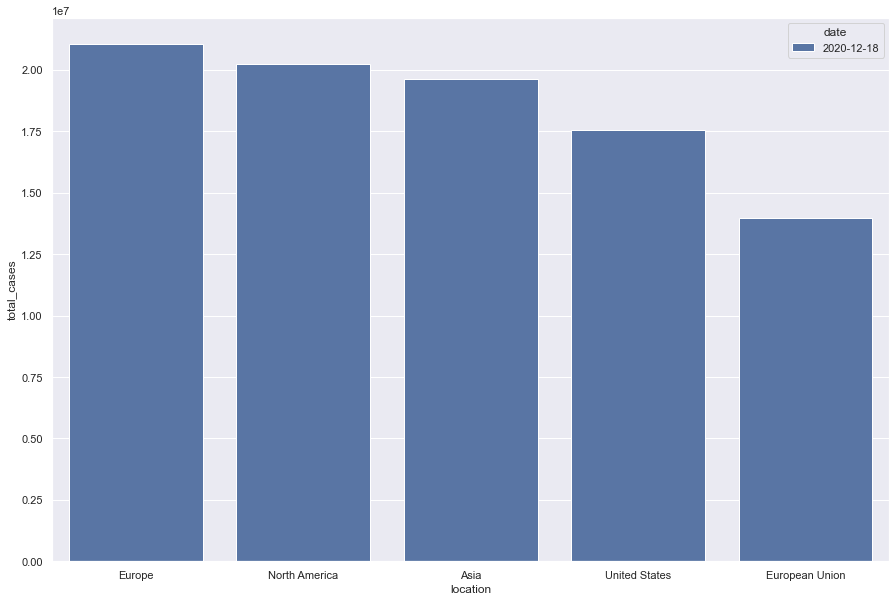

In [37]:
sns.barplot(x="location", y="total_cases", data=max_cases_country[1:6], hue="date")
plt.show()